Adapted for Yb from:

https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/Rydberg_atoms_a_primer.html#Rydberg-Atom-Lifetimes

In [14]:
# Configure the matplotlib graphics library and configure it to show 
# figures inline in the notebook

# %matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
# from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
#import sys, os
#rootDir = '/Users/joannalis/Documents/ARC-Alkali-Rydberg-Calculator-master' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
#sys.path.insert(0,rootDir)

from arc import*
from arc.beta import *                 #Import ARC (Alkali Rydberg Calculator)

import scipy as sp
import scipy.constants

In [15]:
""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon_0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
e = sp.constants.e
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

In [19]:
class Ytterbium174(DivalentAtom):
    """
    Properties of Ytterbium 174 atoms
    """

    ionisationEnergycm = 50443.08  # cm-1  ref. [#yb3]
    ionisationEnergy = ionisationEnergycm / 8065.544  # eV ref.

    Z = 70
    I = 0

    #: TODO source
    scaledRydbergConstant = 109736.627 * 1e2 * \
        physical_constants["inverse meter-electron volt relationship"][0]

    
    quantumDefect = [[[4.278337, -5.625, 91.65, -156050, -4.973e7, 1.102e10],
                      [3.95433, -12.33, 1729.0, 0.0, 0.0, 0.0],
                      [2.713094, -1.8646, -2145.5,  3940500, -3.1036e9, 1.0690e12],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [5.53658095, -1.62860818e3, 8.89586904e5, -2.56965006e8, 3.68075379e10, -2.05360653e12],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [3.35341176, 1.39820521e4, -5.21416397e7, 8.52192405e10, -6.58314910e13, -1.95529526e16],
                      [2.748679, -0.5200, -1186.01,  1564600, -9.8134e8, 2.426e11],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
                     [[4.4382, 6.0, -1.8e4, 1.8e7, -7.0e9, 0.0],
                      [3.91038501, 4.44122338e1, -6.00452428e4, 2.91808081e7, -6.11071416e9, 4.59331291e11],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]
    
    """ Contains list of modified Rydberg-Ritz coefficients for calculating
        quantum defects for
        [[ :math:`^1S_{0},^1P_{1},^1D_{2},^1F_{3}`],
        [ :math:`^3S_{0},^3P_{0},^3D_{1},^3F_{2}`],
        [ :math:`^3S_{0},^3P_{1},^3D_{2},^3F_{3}`],
        [ :math:`^3S_{1},^3P_{2},^3D_{3},^3F_{4}`]]."""

    #3S1: https://arxiv.org/pdf/1912.08754.pdf
    #1S0, 1D2, 3D2: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.98.062506?casa_token=pPBhrZ-7EEsAAAAA%3AcQenteyGZIEsoy3M2fF1vQLvwHpW_dPubroCIzQ1lgcilhoJnSoqsoSoDjNBNmiyfuk7opAa8Orsfw
    #1P1: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.45.1732
    #3P0,1,2: https://iopscience.iop.org/article/10.1088/0022-3700/17/18/006/pdf

    groundStateN = 6
    extraLevels = []  #: TODO unkown if such exist at time of writing

    #: Sources Refs. [#yb1]_, [#yb2]_, [#yb3]_
    levelDataFromNIST = "yb_level_data.csv"

    precalculatedDB = "yb_precalculated.db"
    dipoleMatrixElementFile = "yb_dipole_matrix_elements.npy"
    quadrupoleMatrixElementFile = "yb_quadrupole_matrix_elements.npy"

    literatureDMEfilename = 'ytterbium_literature_dme.csv'

    elementName = 'Yb174'
    meltingPoint = 819 + 273.15  #: in K

    #: Ref. [#nist]_
    mass = 173.9388664 * \
        physical_constants["atomic mass constant"][0]

    #: Quantum defect principal quantum number fitting ranges for different
    #: series
    defectFittingRange = {"1S0": [23, 80], "1P1": [39, 55], 
                          "1D2": [31, 80], "3D2": [28, 80], 
                          "3S1": [35, 80], "3P0": [19, 33],
                          "3P1": [34, 84], "3P2": [18, 93]}

In [20]:
#Load parameters for Yb 174
atom=Ytterbium174()

# Content

1. [Single Rydberg Atom](#1)

>    1.1 [Rydberg Atom Energy Levels](#1.1)

>    1.2 [Dipole Matrix Elements](#1.2)   

>    1.3 [Quadrupole matrix elements](#1.3)    

>    1.4 [Rydberg Atom Lifetimes](#1.4)   

>    1.5 [Creating Rydberg state](#1.5)    
> >    1.5.1 [Rabi Frequency](#1.5.1)       

>    1.6 [Rydberg Atom Stark shifts](#1.6)   
> >    1.6.1 [Dipole matrix elements in electric field](#1.6.1)
        
2. [Rydberg-Rydberg Interactions](#2)

>   2.1 [$C_6$ and $C_3$ coeffcients](#2.1)
    
>   2.2 [Long range interactions](#2.2)
    
>   2.3 [Scaling of $C_6$ and Rydberg blockade with principal quantum number](#2.3)
    
>   2.4 [Short range interaction](#2.4)    
>>   2.4.1 [Spheghetti in the short distance region](#2.4.1)
        
>   2.5 [Pair-state energy at fixed detunning](#2.5)
    
>   2.6 [Resonant interactions](#2.6)


3. [General atomic vapour properties](#3)

# Single Rydberg Atom <a class="anchor" id="1"></a>

## Rydberg Atom Energy Levels <a class="anchor" id="1.1"></a>

Rydberg states are highly excited states of the outer valence electron where the properties can be scaled in terms of the principal quantum number,  𝑛 . Originally observed in the spectral lines of hydrogen, the binding energy of the Rydberg series are given by
$$
E_{nlj} = -\frac{R}{(n-\delta_{n\ell j})^2}
$$
where $n$, $\ell$, $j$ are the quantum numbers, $R$ is the Rydberg constant and $\delta_{n\ell j}$ is the quantum defect. This defect describes the increase in binding energy for an alkali atom with respect to Hydrogen due to penetration and polarisation of the closed inner electron shells, which is most significant for the  $\ell=0$  states with highly elliptical orbits, and can be neglected for states with  $\ell>3$ . The quantum defects are parameterised via
$$
\delta_{n\ell j} = \delta_0 + \frac{\delta_2}{(n-\delta_0)^2} + \frac{\delta_4}{(n-\delta_0)^4} + \dots
$$
with coefficients $\delta_{0,2,\dots}$ taken from measured energy levels.

The mass corrected Rydberg constant is given by $R=R_\infty \times M/(M+m_e)$ where $m_e$ is the electron mass and $M$ is the atomic mass of the nucleus with
$$
R_\infty = \frac{e^4m_e}{16\pi^2 \epsilon_0^2 \hbar^2} .
$$

In [12]:
#this clearly does not include (hyper)fine splittings (no j number)
#also shouldn't 1S be the ground state?

nmin=6  #Minimum n
nmax=80 #Maximum n
lmin=0  #Minimum l
lmax=3  #Maxmium l

#Plot Energy Levels of Yb 174
levels = LevelPlot(atom)
levels.makeLevels(nmin,nmax,lmin,lmax, sList=[0,1])
levels.drawLevels()
levels.showPlot()
# plot is interactive when called outside the IPython notebook (e.g. from Python program)

ValueError: Quantum defects for requested state (n = 6, l = 2, j = 1.0, s=1.0) are uknown. Aborting calculation.

Text(0.5, 1.0, 'Yb Quantum Defects')

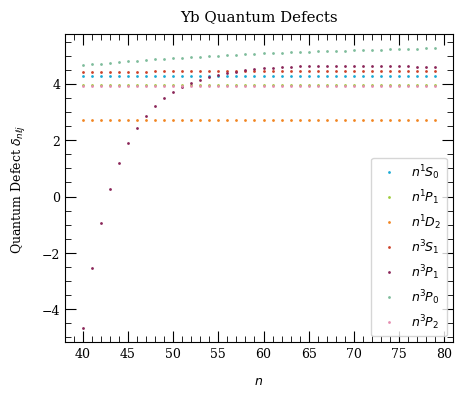

In [20]:
n=np.arange(40,80,1)
    
#Plot Quantum Defects of Yb
fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)

axes.plot(n,atom.getQuantumDefect(n,l=0,j=0,s=0),'.',label="$n{}^1S_{0}$")
axes.plot(n,atom.getQuantumDefect(n,l=1,j=1,s=0),'.',label="$n{}^1P_{1}$")
axes.plot(n,atom.getQuantumDefect(n,l=2,j=2,s=0),'.',label="$n{}^1D_{2}$")
axes.plot(n,atom.getQuantumDefect(n,l=0,j=1,s=1),'.',label="$n{}^3S_{1}$")
axes.plot(n,atom.getQuantumDefect(n,l=1,j=1,s=1),'.',label="$n{}^3P_{1}$")
axes.plot(n,atom.getQuantumDefect(n,l=1,j=0,s=1),'.',label="$n{}^3P_{0}$")
axes.plot(n,atom.getQuantumDefect(n,l=1,j=2,s=1),'.',label="$n{}^3P_{2}$")

axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('Yb Quantum Defects')

## Dipole Matrix Elements<a class="anchor" id="1.2"></a>

Relevant properties of the Rydberg states can be derived through evaluation of the dipole matrix elements. Recalling the seaprability of the atomic wavefunctions into radial and spherical components $\psi(r,\theta,\phi)=Y_{\ell, m_\ell}(\theta,\phi)R_{n\ell}(r)$ in the uncoupled basis, the dipole matrix elements can be expressed as 
$$
\langle n,\ell,m_\ell\vert r_q \vert n',\ell',m_\ell' \rangle = (-1)^{\ell-m_\ell}\begin{pmatrix}\ell&1&\ell'\\-m_\ell&q&m_\ell'\end{pmatrix}\langle\ell \vert\vert r\vert\vert\ell'\rangle,
$$
where $q=-1, 0, 1$ corresponds to $\sigma^+$, $\pi$, $\sigma^-$ transitions respectively with the reduced matrix element
$$
\langle\ell\vert\vert r\vert\vert\ell'\rangle = (-1)^\ell\sqrt{(2\ell+1)(2\ell'+1)}\begin{pmatrix}\ell&1&\ell\\0&0&0\end{pmatrix}\mathcal{R}_{n\ell\rightarrow n'\ell'},
$$

where round braces denote Wigner-3j symbols and the readial matrix element is evaluated from 
$$
\mathcal{R}_{n\ell\rightarrow n'\ell'} = \int_{r_{\rm i}}^{r_{\rm o}} R_{n,\ell}(r)rR_{n',\ell'}(r)r^2\mathrm{d} r.
$$

For highly excited states the hyperfine-structure splitting becomes negligible, however the fine-structure splitting $\hat{\mathcal{H}}=\beta \bf\hat{L}\cdot\hat{S}$ means the relevant basis is then fine structure basis $(j, m_j)$ with matrix elements
$$
\langle n,\ell,j,m_j\vert r_q \vert n',\ell',j',m_j' \rangle = (-1)^{j-m_j}\begin{pmatrix}j&1&j'\\-m_j&q&m_j'\end{pmatrix}\langle j \vert\vert r\vert\vert j'\rangle,
$$
and the reduced matrix element equal to
$$
\langle j \vert\vert r\vert\vert j'\rangle = (-1)^{\ell+s+j'+1}\delta_{s,s'}\sqrt{(2j+1)(2j'+1)}
\begin{Bmatrix}j&1&j'\\\ell'&s&\ell\end{Bmatrix}\langle \ell\vert\vert r\vert\vert\ell'\rangle, 
$$
where the curly braces denote a Wigner-6j symbol.

The matrix elements for the transitions to the neighbouring Rydberg states are very large ($\propto n^2$) due to the large electron radius. The matrix elements for transitions between Rydberg states can then be even 1000 times greater than the equivalent low-lying transitions (large dipole moments), making them ideal for expoiting strong, long-range interactions.

In [14]:
#Yb Transition 6 1S_{0}-->6 1P_{1}

n1=6
l1=0
j1=0
mj1=0
n2=6
l2=1
j2=1
mj2=1
q=+1
print("Yb Transition 6 1S_{0}-->6 1P_{1}")
print("====================================")
#Radial Matrix element R_{nlj\rightarrown'l'j'}
print("R_{nlj-n'l'j'} = %.3f ea_0" % atom.getRadialMatrixElement(n1,l1,j1,n2,l2,j2,s=0))
#Reduced Matrix Element <l||er||l'>
print("<l||er||l'> = = %.3f ea_0" % atom.getReducedMatrixElementL(n1,l1,j1,n2,l2,j2,s=0))
#Reduced Matrix Element <j||er||j'>
print("<j||er||j'> = %.3f ea_0" % atom.getReducedMatrixElementJ(n1,l1,j1,n2,l2,j2,s=0))
#Angular Coupling
print("<nljmj|er|n'l'j'mj'> = %.3f ea_0\n" %\
        atom.getDipoleMatrixElement(n1,l1,j1,mj1,n2,l2,j2,mj2,q,s=0))

#Yb Rydberg Transition 60 1S_{0}-->60 1P_{1}
n1=60
l1=0
j1=0
mj1=0
n2=60
l2=1
j2=1
mj2=1
q=+1

print("Yb Rydberg Transition 60 1S_{0}-->60 1P_{1}")
print("===========================================")
#Radial Matrix element R_{nlj\rightarrown'l'j'}
print("R_{nlj-n'l'j'} = %.3f ea_0" % atom.getRadialMatrixElement(n1,l1,j1,n2,l2,j2,s=0))
#Reduced Matrix Element <l||er||l'>
print("<l||er||l'> = = %.3f ea_0" % atom.getReducedMatrixElementL(n1,l1,j1,n2,l2,j2,s=0))
#Reduced Matrix Element <j||er||j'>
print("<j||er||j'> = %.3f ea_0" % atom.getReducedMatrixElementJ(n1,l1,j1,n2,l2,j2,s=0))
#Angular Coupling
print("<nljmj|er|n'l'j'mj'> = %.3f ea_0\n" % \
        atom.getDipoleMatrixElement(n1,l1,j1,mj1,n2,l2,j2,mj2,q,s=0))

Yb Transition 6 1S_{0}-->6 1P_{1}


NoConvergence: Hypergeometric series converges too slowly. Try increasing maxterms.

For low-lying states, Numerov integration is usually not accurate enough in estimating dipole matrix element. Package also has a .csv table for each element, that can be manually expanded if needed, with various literature values for dipole matrix elements. These values are either obtained experimentally, or by more advanced theoretical calculations. If value is existing in the literature, package will by default use the literature value with the smallest error estimate.

In [15]:
hasLiteratureValue,dme, info = atom.getLiteratureDME(n1=6,l1=1,j1=1,n2=7,l2=0,j2=1,s=1)
if hasLiteratureValue:
    print("%.2f ea_0" % dme)
    # additional information about the source
    s = "experiment"
    if info[0]==1:
        s = "theory"
    print(" source = %s\n errorEstimate = %.2f\n comment = %s\n reference = %s\n doi = %s" % \
        (s,info[1],info[2],info[3],info[4]))

## Quadrupole matrix elements<a class="anchor" id="1.3"></a>

For accurate interaction potentials at short range, it is necessary to also consider quadrupole matrix elements for the Rydberg atoms. `getQuadrupoleMatrixElement`
$$
\mathcal{R}^Q_{n\ell\rightarrow n'\ell'} = \int_{r_{\rm i}}^{r_{\rm o}} R_{n',\ell}(r)r^2R_{n,\ell'}(r)r^2\mathrm{d} r.
$$

Example for $6{}^1S_0\rightarrow n{}^3D_2$:

In [16]:
nList = [24,27,29,34,39,44,47,49,54,59]
n1=6
l1=0
j1=0
s=1
l2=2
j2=2
for n in nList:
    print("n=%i : %.2e e^2 a_0^4" %(n, atom.getQuadrupoleMatrixElement(n1,l1,j1,n,l2,j2,s)**2))
    

ValueError: Quantum defects for requested state (n = 6, l = 0, j = 0.0, s=1.0) are uknown. Aborting calculation.

## Rydberg Atom Lifetimes<a class="anchor" id="1.4"></a>

### See warnings below. Those calculations may not be accurate! 

Rydberg atoms have surpsrisingly long radiative lifetimes. For example $nS$ states are of the order of $10 \mu s$ for $n\sim 30$. Lifetimes $\tau$ of $n$ states, with samll orbital angular momentum $\ell$ like $S$ or $P$ states scales as $\tau \propto n_*^3$, where $n_*=n-\delta$ is the effective principal quantum number. Of all possible $\ell$, circular states $\ell=n-1$ have longest lifetimes, that scales as $\tau \propto n_*^5$. 

Note: $n_*^3$ and $n_*^5$ scalings are quoted for alkali atoms, as you see below for Yb the scalings slightly deviate from exponents $3$ and $5$. This may be because the lifetime calculations do not include the inter-electron correlations which make significant impact for divalent atoms. 

In [17]:
print("%.2e s" % (atom.getStateLifetime(n=30,l=0,j=1,s=1)) )

NoConvergence: Hypergeometric series converges too slowly. Try increasing maxterms.

The radiative lifetime is calculated from the Einstein-A coefficients as $1/\tau_0 = \sum_{n'\ell'}A_{n\ell\rightarrow n'\ell'}$, with the summation over all dipole coupled states with energy $E_{n'\ell'} < E_{n\ell}$ and the A-coefficient calculated as 
$$
A_{n\ell\rightarrow n'\ell'}=\frac{4\omega_{nn'}^3}{3c^3}\frac{\ell_\mathrm{max}}{2\ell+1}\mathcal{R}^2_{n\ell\rightarrow n'\ell'}.
$$
Here the prefeactor of $\omega^3_{nn'}$ means that although the dipole matrix elements for Rydberg-Rydberg transitions to the nearby $n$ states is much larger than for the Rydberg-ground state transitions, the A-coefficients can be much larger for the latter transitions, resulting in the lowest energy transitions being the dominant decay pathways for radiative decay from the Rydberg states. 

At finite temperature, the black-body excitation spectrum causes a reduction in the lifetime due to driving transitions in the GHz and THz region to neighbouring Rydberg states both above and below the energy of the original Rydberg state. The black body loss is given by 
$$
\frac{1}{\tau_\mathrm{BBR}}=\displaystyle\sum_{n'\ell'} \frac{A_{n\ell\rightarrow n'\ell'}}{\exp(\omega_{nn'}/k_\mathrm{B}T)-1},
$$
with the effective lifetime $1/\tau_\mathrm{eff} = 1/\tau_0 + 1/\tau_\mathrm{BBR}$.

Below: finite temperature effects showing the strength of the diffent decay pathways for the  Rydberg  state at 300K. 

Red: contribution from radiative decay 
Green: contribution from black-body induced transitions

The effective lifetime is reduced at room temperature compared to the natural lifetime.

In [18]:
pqn = []
y = []
ybb = []

#initial Rydberg state
nR=80
lR=0 #S state
jR=1
sR=1
    
for n in xrange(5,110):
    pqn.append(n)
    
    #if multiple transition add respective transition rates
    noBBR = atom.getTransitionRate(nR, lR, jR, n2=n, l2=1, j2=0, temperature=0.1, s=sR)
    
    withBBR =  atom.getTransitionRate(nR, lR, jR, n2=n, l2=1, j2=0, temperature=300.0, s=sR)
    
    y.append(noBBR)
    ybb.append(withBBR-noBBR)
    
pqn=np.array(pqn) 
y = np.array(y)
ybb = np.array(ybb)

width = 0.4
plt.figure(figsize=(5,4), dpi=100)
plt.bar(pqn-width/2.,y,width=width,color="r")
plt.bar(pqn+width/2.,ybb,width=width,color="g")
plt.xlabel("Principal quantum number, $n$")
plt.ylabel(r"Transition rate (s${}^{-1}$)")
plt.title("Transition from %i ${}^3S_{1}$ to $n$ ${}^3P_{0}$" %nR)
plt.legend(("Spontaneous decays","Black-body induced transitions"),fontsize=10)
plt.xlim(4,110)
plt.show()

display(HTML("Lifetime (0 K) &tau;<sub>0</sub> = %.2f &mu;s" % \
             (atom.getStateLifetime(nR,lR,jR,s=sR) *1.e6)))
display(HTML("Lifetime (300 K) &tau;<sub>eff</sub> = %.2f &mu;s" % \
             (atom.getStateLifetime(nR,lR,jR,s=sR,temperature=300.,includeLevelsUpTo=110) *1.e6)))

NoConvergence: Hypergeometric series converges too slowly. Try increasing maxterms.

Black-body induced state depopulation rates:

In [19]:
%%capture

stateL = 0; stateJ = 1; stateS=1 # 3S_{1} states
BBRdepopulationRate = []
nList = np.arange(6,100)
for n in nList:
    noBBR = 1./atom.getStateLifetime(n,stateL,stateJ,temperature=0, s=stateS)
    withBBR = 1./atom.getStateLifetime(n,stateL,stateJ,temperature=300,includeLevelsUpTo=n+10, s=stateS)
    BBRdepopulationRate.append(withBBR-noBBR)

NoConvergence: Hypergeometric series converges too slowly. Try increasing maxterms.

ValueError: x and y must have same first dimension, but have shapes (94,) and (0,)

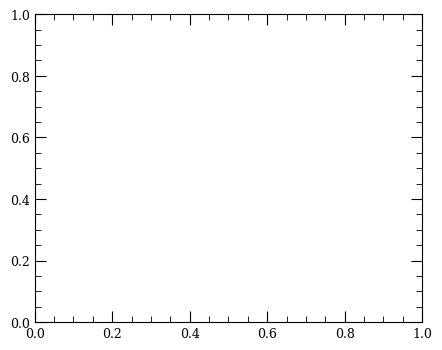

In [20]:
plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111)
ax.plot(nList,BBRdepopulationRate,"r.:")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"BBR induced depopulation rate (s$^{-1}$)")
plt.show()

Comparing lifetimes for different principal quantum numbers $n$ and orbital angular momentum states $\ell$, we see that the lifetimes for $nP$ scales with $n_*$ to a lower exponent than the lifetimes for circular states $n, \ell = n-1$.

In [21]:
%%capture

pqn = np.arange(10,80,2)

nstar1 = []; nP_lifetime = []
nstar2 = []; circular_state_lifetime = []

for n in pqn:
    nstar1.append(n - atom.getQuantumDefect(n,l=1,j=1, s=0))
    nP_lifetime.append(atom.getStateLifetime(n,l=1,j=1, s=0))

    nstar2.append(n - atom.getQuantumDefect(n,n-1,n-1, s=0))
    circular_state_lifetime.append(atom.getStateLifetime(n,n-1,n-1, s=0))

nstar1 = np.array(nstar1); nP_lifetime = np.array(nP_lifetime)
nstar2 = np.array(nstar2); circular_state_lifetime = np.array(circular_state_lifetime)

ValueError: math domain error

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

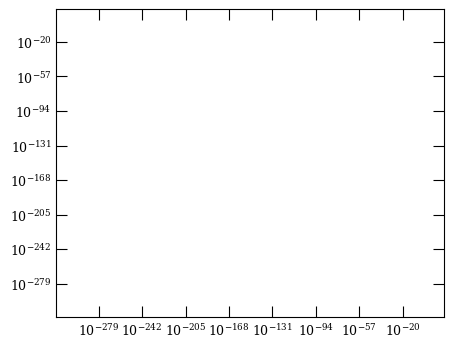

In [22]:
f = plt.figure(figsize=(5,4), dpi=100)
ax = f.add_subplot(1,1,1)
ax.loglog(nstar1,nP_lifetime,"b.")
ax.loglog(nstar2,circular_state_lifetime,"rv")

# fitting n^3 dependance for nP state lifetime
def func3(x, a, b):
    return a+b*x
popt, pcov = curve_fit(func3, np.log(nstar1), np.log(nP_lifetime))
ax.loglog(nstar1,np.exp(func3(np.log(nstar1),*popt)),"b:")
exponent_P = popt[1]

# fitting n^5 dependance for n,l=n-1 streatched state lifetime
def func5(x, a, b):
    return a+b*x
popt, pcov = curve_fit(func5, np.log(nstar2), np.log(circular_state_lifetime))
ax.loglog(nstar2,np.exp(func5(np.log(nstar2),*popt)),"r:")
exponent_circ = popt[1]

ax.set_title("Lifetime scaling")
ax.legend([r"$|n,P,j=1, s=0\rangle$ states",r"$|n,\ell=n-1,j=n-1, s=0\rangle$ circular states"],loc=2,fontsize=10)
ax.text(20,1e-3,r"$\propto n_*^{%.1f}$" %exponent_circ, fontsize=12)
ax.text(30,3e-6,r"$\propto n_*^{%.1f}$" %exponent_P, fontsize=12)
ax.set_xlim(7,81)
ax.set_xlabel("Scaled principal quantum number, $n_*$")
ax.set_ylabel("State lifetime (s$^{-1}$)")
plt.tight_layout()

## Creating Rydberg state<a class="anchor" id="1.5"></a>

Rydberg atoms are highly excited atoms. If the excitation is done in single step necessary energy would typically correspond to UV radiation. 

**Note: this is clearly wrong... not sure why.**

In [23]:
print("Yb Excitation 6 1P_{1} -> 60 1S_{0}")
n1 = 6; l1 = 1; j1 = 1; s=0; #Initial State
n2 = 80; l2 = 0; j2 = 0; s2=0; #Final State

trans_w = abs(atom.getEnergy(n1,l1,j1, s=s) - atom.getEnergy(n2,l2,j2, s=s2))*e / h
trans_L = c/trans_w

print("lambda = %.3f nm" % (trans_L*1e9))
print("omega/2pi = %.3f THz" % (trans_w*1e-12))

Yb Excitation 6 1P_{1} -> 60 1S_{0}
lambda = 1503857.649 nm
omega/2pi = 0.199 THz


### Rabi Frequency<a class="anchor" id="1.5.1"></a>

The transition strength is characterised by the Rabi frequency $\Omega=d \cdot \varepsilon / \hbar$, where $d$ is the dipole matrix element (as calculated before) and $\varepsilon$ is the lectric field of the laser driving the excitation. Recalling that for a Gaussian beam $1/e^2$ radius of $\omega_0$ and power $P$, the internsity is given by
$$
I = \frac{2P}{\pi\omega_0^2}
$$
which is related to the electric field by $I = c\epsilon_0 |\varepsilon|^2 / 2$, resulting in the Rabi frequency of
$$
\Omega = \sqrt{\frac{4P}{\epsilon_0c\pi w_0^2}}\frac{\langle n,\ell,j,m_j\vert r_q \vert n',\ell',j',m_j' \rangle}{\hbar}.
$$

Due to the weak overlap between the ground and highly excited Rydberg states (which scales as $\propto n_*^{-3/2}$), the resulting matrix elements are relatively small meaning large intensities are required. 

**pretty sure those Rabi frequencies are too high**

In [24]:
#Laser Parameters
waist = 10.e-6 # 10 mu m
P = 100.e-3 # 100 mW

n1 = 6; l1 = 1; j1 = 0; mj1=0; s=1 #Initial State
n2 = 80; l2 = 0; j2 = 1; mj2=0; #Final State

q=+1; #Light Polarisation (sigma+)

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1,
                                 n2, l2, j2,
                                 q, P, waist, s)
print("rabi Frequency = 2 pi x %.2f MHz" %(rabiFreq/(2*pi)*1e-6))

NoConvergence: Hypergeometric series converges too slowly. Try increasing maxterms.

## Rydberg Atom Stark shifts<a class="anchor" id="1.6"></a>

The large dipole moment of the rydberg states makes them highly polarisable. For an atom in a d.c. electromagnetic field $\varepsilon$ directed along the z-axis, the interaction leads to a coupling given by
$$
\mathcal{H} = \mathcal{H}_0 + \mathcal{E}\hat{z}, 
$$
where $\mathcal{H}_0$ is the Hamiltonian for the unperturnbed energy levels and $\hat{z}=r_0$ is the spherical basis resulting in a selection rule $\Delta m_j=0$ and a shift dependent on $|m_j|$. For the low-$\ell$  states, the quantum defects cause the first-order Stark-shift to vanish, resulting in a second-order energy shift $\Delta E = -\frac{1}{2} \alpha_0\varepsilon^2$, where the polarizability for state $|n\ell jm_j\rangle$ is given by
$$
\alpha_0 = 2 e^2\displaystyle\sum_{n'\ell'j'\neq n\ell j} \frac{\vert \langle n,\ell,j,m_j\vert r_0 \vert n',\ell',j',m_j' \rangle \vert^2}{E_{n'\ell' j'}-E_{n\ell j}}.
$$

Sincec the dipole matrix elements scale as $n^2$, and the energy difference scales as $n^{-3}$ the scalar polarizability $\alpha_0 \propto n^7$. States with $\ell>3$ are degenerate and therefore expierence a linear Stark shift. 

The evaluation of polarisability using second-order perturbation theory is limited, and only valid at weak fields. Instead, Stark maps accurate to all orders can be obtained by direct diagonalisatoin of the Hamiltonian $\mathcal{H}$, taking care to include a large enough set of basis states to achieve divergence. As well as revealing the exact energies of the Stark-coupled states, this permits extraction of the mixed electric field eigenstates which are relevant when considering optical excitation of a given Rydberg state which is now mixed into neighbouring energy levels.

About the plot below:

- After identifying the target state, a range of basis states are defined before running the diagonalisation for the range of E-fields specified, returning the desired Stark map. 

- To show the effect of state mixing, the levels are coloured proportional to the fraction of the target state present in each eigenstate. This knowledge can also be used to determine the effective polarisability by extracting the energy level of the eigenstate with a contribution of at least 90% of the original target state.

- For high $n$, the range of basis states may need to be increased due to the reduction in energy spacings but this can easily be checked for convergence by running twice with a larger basis set.

In [25]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Yb
calc = StarkMap(Ytterbium174())

#Target state
n0=40;l0=0;j0=1;mj0=1;s=1  #40 3S1
#Define max/min n values in basis
nmax=50
nmin=30
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. #Min E field (V/m)
Emax=20000. #Max E field (V/m)
N=1001 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlighState = True)
calc.showPlot(interactive = False)
#Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

Found  1200  states.
Generating matrix...
0%

ValueError: Quantum defects for requested state (n = 30, l = 2, j = 1.0, s=1.0) are uknown. Aborting calculation.

### Dipole matrix elements in electric field<a class="anchor" id="1.6.1"></a>

The eigen-states in the electric field are strongly admixed bare states. One can calculate dipole matrix elements between two states in electric field. 

Here:
- Firstly, we write a calculation class, demonstrating how one can access and reconstruct directly Stark Hamiltonian from provided class variables. 
- Secondly, we present an example of calculation of d.m.e. in electric field.

**this is not working for Yb, limited number of transitions that I can check does not help, also all transitions involving $^1S_0$ give `nan` for couplings**

In [26]:
from scipy.sparse import csr_matrix

class MatrixElementsEfield:
    
    def __init__(self,StarkMap1,StarkMap2, progressOutput = False):
        """
            calculates dipolar coupling between the two original target states
            of the two Stark Maps
        
            Note:
                StarkMaps have to have **defined basis** 
                AND
                StarkMaps have to be calculated **for the same atom**
        """
        # save pointers to Stark maps for later
        self.StarkMap1 = StarkMap1
        self.StarkMap2 = StarkMap2
        
        # construct and save CSV sparce matrix of couplings
        matrixDMEcoupling = [[],[],[]]
        
        for i in range(len(StarkMap1.basisStates)):
            if progressOutput:
                sys.stdout.write("\r%d%%" % (float(i)/float(len(StarkMap1.basisStates)-1)*100))
                sys.stdout.flush()
            for j in range(len(StarkMap2.basisStates)):
                # if dipole coupled, add to coupling
                dl = abs(StarkMap1.basisStates[i][1]-StarkMap2.basisStates[j][1])
                dj = abs(StarkMap1.basisStates[i][2]-StarkMap2.basisStates[j][2])
                if dl==1 and (dj<1.1):
                    dme = StarkMap1.atom.getDipoleMatrixElement(\
                                          StarkMap1.basisStates[i][0],StarkMap1.basisStates[i][1],\
                                          StarkMap1.basisStates[i][2], StarkMap1.basisStates[i][3],\
                                          StarkMap2.basisStates[j][0], StarkMap2.basisStates[j][1],\
                                          StarkMap2.basisStates[j][2], StarkMap2.basisStates[j][3],\
                                          q)
                    matrixDMEcoupling[0].append(dme)
                    matrixDMEcoupling[1].append(i)
                    matrixDMEcoupling[2].append(j)
                    
        self.matrixDMEcoupling = csr_matrix((matrixDMEcoupling[0], \
                                 (matrixDMEcoupling[1], matrixDMEcoupling[2])),\
                                shape=(len(StarkMap1.basisStates), len(StarkMap2.basisStates)) )


    def getDipolarCoupling(self,eField):
        """
            find dipolar coupling and transition frequency between target states
            
            Target states are specified during the initialization procedure of the StarkMap1 and StarkMap2
        """

        # find first state in electric field
        m = self.StarkMap1.mat1 + self.StarkMap1.mat2 * eField
        ev,egvector = eigh(m)

        # locate which of the eigenvectors has biggest contribution of the orginal state
        # and save that state composition
        # NOTE: advanced users might want to change this close to avoided crossings
        state1index = np.argmax( np.absolute( egvector[self.StarkMap1.indexOfCoupledState,:] ) )
        state1composition = egvector[:,state1index]
        energy1 = ev[state1index]
    
        # find second state in electric field
        m = self.StarkMap2.mat1 + self.StarkMap2.mat2 * eField
        ev,egvector = eigh(m)

        # locate which of the eigenvectors has biggest contribution of the orginal state, and save that state composition
        state2index = np.argmax( np.absolute( egvector[self.StarkMap2.indexOfCoupledState,:] ) )
        state2composition = egvector[:,state2index]
        energy2 = ev[state2index]
    
        # find coupling between the states

        coupling = self.matrixDMEcoupling.dot(state2composition).dot(state1composition)
               
        return abs(coupling),abs(energy1-energy2)


In [27]:
# Stark map for the first state
n1=25
l1=1
j1=1
mj1=1
n2=25
l2=2
j2=2
mj2=1
q=0
s=0

deltaN = 5
maxL = 30

print("1:")
stMap1 = StarkMap(atom)
stMap1.defineBasis(n1,l1,j1, mj1,n1-deltaN,n1+deltaN,maxL,progressOutput = True,s=s)
print("2:")
stMap2 = StarkMap(atom)
stMap2.defineBasis(n2,l2,j2, mj2,n2-deltaN,n2+deltaN+1,maxL,progressOutput = True,s=s)


calc = MatrixElementsEfield(stMap1,stMap2, progressOutput = True)
c,f = calc.getDipolarCoupling(500.e2)

couplingList = []
frequencyList = []
eFieldList = np.linspace(0,500.e2,51)
for eField in eFieldList:
    c, f = calc.getDipolarCoupling(eField)
    couplingList.append(c )
    frequencyList.append(f)

1:
Found  235  states.
Generating matrix...
100%

2:
Found  264  states.
Generating matrix...
100%

0%

/Users/alec/anaconda3/lib/python3.7/site-packages/arc/wigner.py:245: RuntimeWarning: invalid value encountered in double_scalars
  WignerReturn += (-1)**t * factorial(t + 1) / (


62%

KeyboardInterrupt: 

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


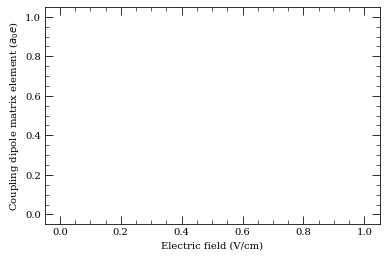

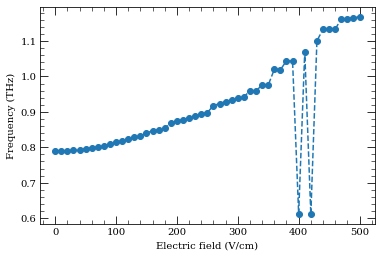

In [214]:
plt.plot(eFieldList/1e2,couplingList,"o--")
print(couplingList)
plt.xlabel("Electric field (V/cm)")
plt.ylabel(r"Coupling dipole matrix element ($a_0 e$)")
plt.show()

plt.plot(eFieldList/1e2,np.array(frequencyList)/1.e3,"o--")
plt.xlabel("Electric field (V/cm)")
plt.ylabel(r"Frequency (THz)")
plt.show()

# Rydberg-Rydberg Interactions<a class="anchor" id="2"></a>

The Rydberg states have extremly large dipole moments making them ideal candidates for controlled long-range interactions in quantum information processing and for studying effects such as resonant energy transfer or superradiance. 

For two atoms separated by distance $\mathbf{R}$ the dipole-dipole intercation is given by
$$
V(\textbf{R}) =  \frac{\textbf{$\mu$}_1\cdot\textbf{$\mu$}_2}{R^3} -\frac{3(\textbf{$\mu$}_1\cdot\textbf{R})(\textbf{$\mu$}_2\cdot\textbf{R})}{R^5},
$$
where the dipole matrix elements $\mu_{1,2}$ describe transitions from the initial Rydberg states $|r\rangle$ to other dipole-coupled states $|r'\rangle$, $|r''\rangle$ respectively. The dipole-coupled pair-states have an energy difference $\Delta$ given by 
$$
\Delta = E_{r'}+E_{r''}-2E_{r},
$$
with the dominant contribution to the atom-atom interaction arising from the pair state with the smallest absolute defect $|\Delta|$. Reducing this to a simple two-pair problem, the Hamiltonian for the states $|rr\rangle$, $|r'r''\rangle$ is given by
$$
\mathcal{H} = \begin{pmatrix}
0 &V(R) \\
V(R)&\Delta
\end{pmatrix},
$$
which has eigenvalues
$$
\lambda_\pm = \frac{\Delta\pm\sqrt{\Delta^2+4V(R)^2}}{2}.
$$

This results in two asymptotic limits for the atom-atom interactions:

**i) Long range "Van der Waals regime" ($V(R)\ll \Delta$)**

Pair state energy is shifted by $-V(R)^2/\Delta = -C_6/R^6$. The sign of the interaction (attractive/repulsive) is determined by $\Delta$, and the interaction scales as $C_6\propto n^{11}$.

**ii) Short range "dipole-dipole regime" ($V(R)\gg \Delta$)**

$\lambda = \pm C_3/R^3$ with $C_3\propto n^4$

The transition between these two regimes is known as the Van der Waals radius occuring at $V(R_\mathrm{vdW})=\Delta$ with $R_\mathrm{vdW}=\sqrt[6]{C_6/|\Delta|}$.

Typically $\Delta \neq 0$ for Rydberg states, however, for small $\Delta$ an external electric field can be used to Stark-shift the pair states into resonance known as a Förster  resonance, resulting in resonant $C_3/R^3$ behaviour at all radii. 

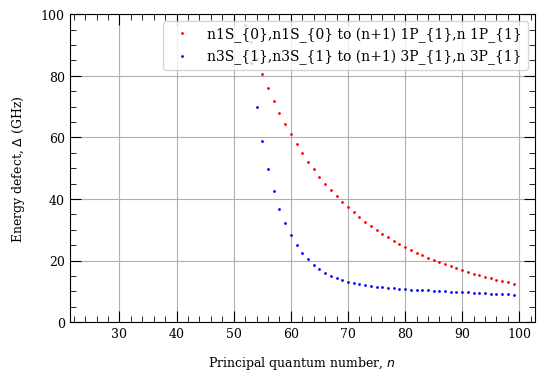

In [21]:
# calcualtion of energy defects

nlist=np.arange(25,100,1)
    

fig, axes = plt.subplots(1, 1, figsize=(6,4), dpi=100)

l1 = 0 ; j1 = 0 #  1S_{0}
l2 = 1 ; j2 = 1 # 1P_{1}
s=0
energyDefect = []
for n in nlist:
    energyDefect.append(atom.getEnergyDefect2(n,l1,j1,n,l1,j1,n+1,l2,j2,n,l2,j2,s)/(C_h)*1e-9)    
axes.plot(nlist,energyDefect,'r.',\
          label=r"n%d%s_{%d},n%d%s_{%d} to (n+1) %d%s_{%d},n %d%s_{%d}"%\
              (int(2*s+1),printStateLetter(l1),int(j1),int(2*s+1),printStateLetter(l1),int(j1),\
              int(2*s+1),printStateLetter(l2),int(j2),int(2*s+1),printStateLetter(l2),int(j2)))

l1 = 0 ; j1 = 1 #  3S_{1}
l2 = 1 ; j2 = 1 # 3P_{1}
s=1
energyDefect = []
for n in nlist:
    energyDefect.append(atom.getEnergyDefect2(n,l1,j1,n,l1,j1,n+1,l2,j2,n,l2,j2,s)/(C_h)*1e-9)
axes.plot(nlist,energyDefect,'b.',\
          label=r"n%d%s_{%d},n%d%s_{%d} to (n+1) %d%s_{%d},n %d%s_{%d}"%\
              (int(2*s+1), printStateLetter(l1),int(j1),int(2*s+1),printStateLetter(l1),int(j1),\
              int(2*s+1),printStateLetter(l2),int(j2),int(2*s+1),printStateLetter(l2),int(j2)))

axes.set_ylim(0,100)
#axes.set_xlim(0,100)
axes.legend(loc=0,fontsize=10)
axes.set_ylabel("Energy defect, $\Delta$ (GHz)")
axes.set_xlabel("Principal quantum number, $n$")
axes.grid()
plt.legend
plt.show()

## $C_6$ and $C_3$ coefficients<a class="anchor" id="2.1"></a>

$C_6$ for individual coupling channels (two pair-states $|n,l,j,n,l,j            \rangle \leftrightarrow |n_1,l_1,j_1,n_2,l_2,j_2\rangle$):

$$
C_6 = \frac{1}{4\pi\varepsilon_0}                     \frac{|\langle n,l,j |er|n_1,l_1,j_1\rangle|^2|                    \langle n,l,j |er|n_2,l_2,j_2\rangle|^2}                    {E(n_1,l_1,j_2,n_2,j_2,j_2)-E(n,l,j,n,l,j)} (h \space \mathrm{Hz}\space \mathrm{m^6})
$$

In [6]:
#[n, l, j, n1, l1, j1, n2, l2, j2, s]
# |nlj , nlj> and |n1l1j1 , n2l2j2>
channels = [[70, 0, 0, 70, 1, 1, 69, 1, 1, 0],#|70 1S0, 70 1S0 > and |70 1P1, 69 1P1>
            [70, 0, 1, 70, 1, 1, 69, 1, 1, 1]]#|70 3S1, 70 3S1 > and |70 3P1, 69 3P1>
print(" = = = Ytterbium = = = ")
for channel in channels:
    print("C6: %.5f  GHz (mu m)^6" % ( atom.getC6term(*channel)/C_h*1.e27 ))

 = = = Ytterbium = = = 
C6: 47.57163  GHz (mu m)^6
C6: 0.05647  GHz (mu m)^6


$C_3$ for individual coupling channels (two pair-states $|n,l,j,n,l,j\rangle                  \leftrightarrow |n_1,l_1,j_1,n_2,l_2,j_2\rangle$):

$$
C_3 = \frac{\langle n,l,j |er                |n_1,l_1,j_1\rangle                 \langle n,l,j |er|n_2,l_2,j_2\rangle}{4\pi\varepsilon_0} (h \space \mathrm{Hz} \space{m^3})
$$

In [7]:
#[n, l, j, n1, l1, j1, n2, l2, j2, s]
# |nlj , nlj> and |n1l1j1 , n2l2j2>
channels = [[70, 0, 0, 70, 1, 1, 69, 1, 1, 0],#|70 1S0, 70 1S0 > and |70 1P1, 69 1P1>
            [70, 0, 1, 70, 1, 1, 69, 1, 1, 1]]#|70 3S1, 70 3S1 > and |70 3P1, 69 3P1>
print(" = = = Ytterbium = = = ")
for channel in channels:
    print("C3: %.0f  GHz (m)^3" % ( atom.getC3term(*channel)/C_h*1.e9 ))

 = = = Ytterbium = = = 
C3: 20  GHz (m)^3
C3: 1  GHz (m)^3


## Long range interactions <a class="anchor" id="2.2"></a>

For the long-range limit, the $C_6$ dispersion coefficient can be calculated using second-order perturbation theory valid for $R>R_\mathrm{vdW}$ and taking a sum over all dipole-coupled pair-states using equation
$$
C_6 = \displaystyle\sum_{r'r''} \frac{\left| \langle r'r''\vert V(R) \vert rr\rangle\right|^2}{\Delta_{r',r''}}.
$$

As well as the dependence upon the sign of $\Delta$ for attractive/repulsive interactions, the form of the dipole interaction above is anisotropic leading to a strong angular sensitivity. Defining an angle $(\theta, \phi)$ in spherical basis between the quantization axis and the interatomic separation vector $\mathbf{R}$, the plots below highlight the difference in interaction strength of the different $\ell$ states. 

Note: Typically, this sum is constrained to include only pair states up to a maximum value of  Δ  to minimise computational overhead, and this can be set to achieve convergence.

Compare with https://arxiv.org/pdf/1203.3736.pdf:

In [8]:
#Long range C6 coefficient from https://arxiv.org/pdf/1203.3736.pdf
#only for mj = +-j states

def C6_lit(n_list, a, b, c):
    return np.array(np.multiply([n**(11) * (a*n**2 + b*n + c) for n in n_list], 1e-19*1.4448))

# 1S0 state
a1 = 9.84*1e-5 ; b1 = 0.0234 ; c1 = -0.421 # in a.u.
# 1P1 state
a2 = -7.74*1e-4 ; b2 = 0.167 ; c2 = -2.73 # in a.u.

c6S_lit = C6_lit([60], a1, b1, c1).flatten()  # in GHz um^6 
c6P_lit = C6_lit([60], a2, b2, c2).flatten()  # in GHz um^6 

print("C6 60 1S0 ; singlet = %.2f GHz (mum)^6 = %.2f 1e-19 a.u." % (c6S_lit, c6S_lit/1.448))
print("C6 60 1P1 ; singlet = %.2f GHz (mum)^6 = %.2f 1e-19 a.u." % (c6P_lit, c6P_lit/1.448))

C6 60 1S0 ; singlet = 7.01 GHz (mum)^6 = 4.84 1e-19 a.u.
C6 60 1P1 ; singlet = 23.61 GHz (mum)^6 = 16.30 1e-19 a.u.


C6 [60 S 0/2] ; singlet = -2.596407387 GHz (mum)^6
------- ; ------- = -1.797070450 1e-19 a.u.


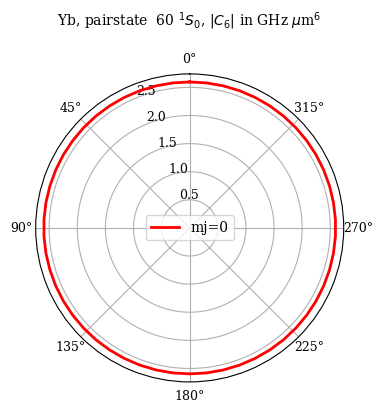

In [9]:
#Dipole-Interaction Dispersion Coefficient: 60 1S0
#================================================
#Evaluation of the Yb Rydberg 60 1S0 C6 coefficient using perturbation theory (Theta=0,phi=0)
n0=60;l0=0;j0=0;mj0=0;s=0 #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state and extract value
calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0, s=s,s2=s)
C6 = calculation.getC6perturbatively(theta,phi, dn, deltaMax)
print("C6 [%s] ; singlet = %.9f GHz (mum)^6" % (printStateString(n0,l0,j0),C6))
print("------- ; ------- = %.9f 1e-19 a.u." % (C6/1.4448))


#Angular Coupling
#================
#Evaluate C6 as a function of angle
thetaList = np.linspace(0,2*pi,55)
plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []

c6 = []
for t in thetaList:
    C6 = calculation.getC6perturbatively(t,phi, dn, deltaMax)
    c6.append(abs(C6))    
    
# plot results
lineLegend, = plt.plot(thetaList,c6,"-",color="r",label=("mj=%d"%int(mj0)) )
line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^1S_{0}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

C6 [60 D 4/2] ; singlet ; mj=0 : -7.521146 GHz (mum)^6
------- ; ------- ; ----- : -5.205666 1e-19 a.u.
C6 [60 D 4/2] ; singlet ; mj=1 : -4.987573 GHz (mum)^6
------- ; ------- ; ----- : -3.452085 1e-19 a.u.
C6 [60 D 4/2] ; singlet ; mj=2 : -2.018154 GHz (mum)^6
------- ; ------- ; ----- : -1.396840 1e-19 a.u.


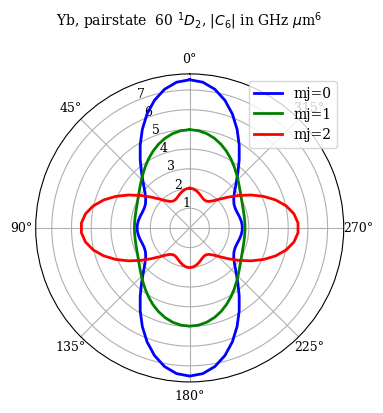

In [10]:
#Dipole-Interaction Dispersion Coefficient: 60 1D2
#=================================================
n0=60;l0=2;j0=2; s=0;#Target State
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

thetaList = np.linspace(0,2*pi,71)
mj = [0,1,2]
colourList = ["b","g","r"]

plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []
    
for i in [0,1,2]:
    calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj[i], mj[i], s=s, s2=s)
    c6 = []
    for t in thetaList:
        C6=calculation.getC6perturbatively(t,phi, dn, deltaMax);
        c6.append(abs(C6))
    
    C6 = calculation.getC6perturbatively(0,0, dn, deltaMax)
    print("C6 [%s] ; singlet ; mj=%i : %.6f GHz (mum)^6" % (printStateString(n0,l0,j0),int(mj[i]),C6))
    print("------- ; ------- ; ----- : %.6f 1e-19 a.u." % (C6/1.4448))
    
    # plot results
    lineLegend, = plt.plot(thetaList,c6,"-",color=colourList[i],label=("mj=%d"%int(mj[i])))
    line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^1D_{2}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

C6 [60 P 2/2] ; singlet ; mj=0 : -64.25 GHz (mum)^6
------- ; ------- ;------ : -44.47 1e-19 a.u.
C6 [60 P 2/2] ; singlet ; mj=1 : -24.24 GHz (mum)^6
------- ; ------- ;------ : -16.77 1e-19 a.u.


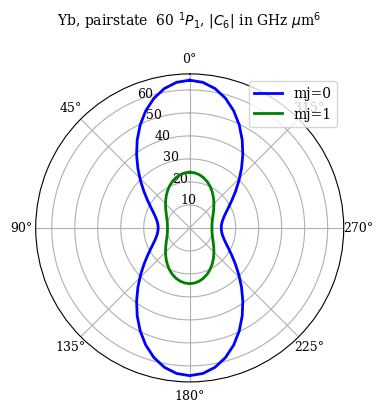

In [11]:
#Dipole-Interaction Dispersion Coefficient: 60 1P1
#=================================================
n0=60;l0=1;j0=1; s=0;#Target State
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

thetaList = np.linspace(0,2*pi,71)
mj = [0,1]
colourList = ["b","g","r"]

plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []
    
for i in [0,1]:
    calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj[i], mj[i], s=s, s2=s)
    c6 = []
    for t in thetaList:
        C6=calculation.getC6perturbatively(t,phi, dn, deltaMax);
        c6.append(abs(C6))
    
    C6 = calculation.getC6perturbatively(0,0, dn, deltaMax)
    print("C6 [%s] ; singlet ; mj=%i : %.2f GHz (mum)^6" % (printStateString(n0,l0,j0),int(mj[i]),C6))
    print("------- ; ------- ;------ : %.2f 1e-19 a.u." % (C6/1.4448))
    
    # plot results
    lineLegend, = plt.plot(thetaList,c6,"-",color=colourList[i],label=("mj=%d"%int(mj[i])))
    line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^1P_{1}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

C6 [60 S 2/2] ; triplet ; mj=0 : 54.88 GHz (mum)^6
------- ; ------- ;------ : 37.98 1e-19 a.u.
C6 [60 S 2/2] ; triplet ; mj=1 : 32.62 GHz (mum)^6
------- ; ------- ;------ : 22.58 1e-19 a.u.


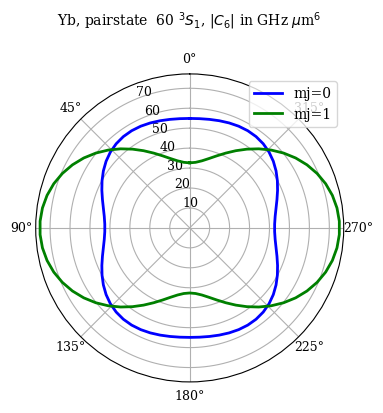

In [5]:
#Dipole-Interaction Dispersion Coefficient: 60 3S1
#=================================================
n0=60;l0=0;j0=1; s=1;#Target State
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9 #Max pair-state energy difference [Hz]

thetaList = np.linspace(0,2*pi,71)
mj = [0,1]
colourList = ["b","g","r"]

plt.figure(figsize=(5,4), dpi=100)
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
line = []
    
for i in [0,1]:
    calculation = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj[i], mj[i], s=s, s2=s)
    c6 = []
    for t in thetaList:
        C6=calculation.getC6perturbatively(t,phi, dn, deltaMax);
        c6.append(abs(C6))
    
    C6 = calculation.getC6perturbatively(0,0, dn, deltaMax)
    print("C6 [%s] ; triplet ; mj=%i : %.2f GHz (mum)^6" % (printStateString(n0,l0,j0),int(mj[i]),C6))
    print("------- ; ------- ;------ : %.2f 1e-19 a.u." % (C6/1.4448))
    
    # plot results
    lineLegend, = plt.plot(thetaList,c6,"-",color=colourList[i],label=("mj=%d"%int(mj[i])))
    line.append(lineLegend)
        
plt.legend(handles=line,fontsize=10)
plt.title("Yb, pairstate  60 ${}^3S_{1}$, $|C_6|$ in GHz $\mu$m$^{6}$ \n",fontsize=10)
plt.show()

Interaction between two $60$ $^3S_1$ atoms at 10 $\mu$m distance:

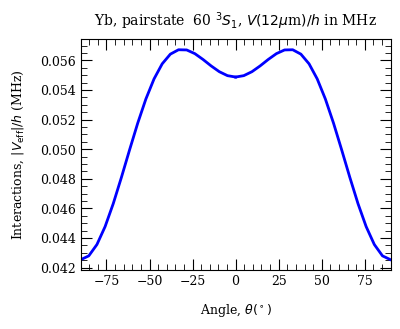

In [13]:
n=60
l=0
j=1
mj=0
s=1

calculation = PairStateInteractions(Ytterbium174(), n,l,j,n,l,j,mj,mj,s=s,s2=s)
thetaList = np.linspace(0,pi/2.,20)  # orientations of the two atoms
atomDistance = 10. # mu m

# do calculation
interactionVeff = []
for t in thetaList:
    c6 = calculation.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append((c6/atomDistance**6)*1.e3)
    
# now plotting
plt.figure(figsize=(4,3), dpi=100)
ax = plt.subplot(111)
ax.plot(thetaList/pi*180,interactionVeff,"b-")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180,interactionVeff,"b-")
ax.set_xlabel(r"Angle, $\theta (^\circ)$")
ax.set_ylabel(r"Interactions, $|V_{\rm eff}|/h$ (MHz)")
ax.set_xlim(-90,90)
plt.title("Yb, pairstate  60 $^3S_1$, $V(12 \mu$m$)/h$ in MHz",fontsize=10)
plt.show()

## Scaling of $C_6$ and Rydberg blockade with principal quantum number<a class="anchor" id="2.3"></a>

At large interatomic separations $\mathbf{R}$, the shift in energy is small compared to the transition linewidth, $\Gamma$, and the second atom can be excited with the same dynamics as expected for the single-atom case. However, at a certain distance $R_B$ known as the blockade radius, the interaction strength, $V$, is sufficient to shift the energy level of
the second atom by more than the transition linewidth, $\Gamma$. Below that blockade distance, given by $V(R_B) = \Gamma$, the second atom is completely decoupled from the driving field, and any laser-induced dynamics bringing it to the given Rydberg state is blocked.

### $^1S_0$

In [23]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(60,91)
c6List = []
blockadeRadiusList = []

l=0
j=0
mj=0
s=0

#Vailant 2012 (for comaprison)
def C6_lit(n_list, a, b, c):
    return np.array([n**(11)*(a*n**2 + b*n + c)*1e-19*1.4448 for n in n_list]) #in GHz um^6
a1 = 9.84*1e-5 ; b1 = 0.0234 ; c1 = -0.421 #1S0 state in a.u.
c6S_list = []

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(int(n),l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(0,0, 5, 35e9)
    c6List.append(c6)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    print("C_6 [%s ; singlet ; mj=%i]= %.2f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6S = C6_lit([int(n)], a1, b1, c1)
    c6S_list.append(c6S)
    print("Vailant 2012: %.2f GHz (mu m)^6" %c6S.flatten())

    blockadeRadiusList.append(blockade)

C_6 [60 S 0/2 m_j= 0 ; singlet ; mj=0]= -2.60 GHz (mu m)^6	3.1 mu m
Vailant 2012: 7.01 GHz (mu m)^6
C_6 [61 S 0/2 m_j= 0 ; singlet ; mj=0]= -3.17 GHz (mu m)^6	3.2 mu m
Vailant 2012: 8.63 GHz (mu m)^6
C_6 [62 S 0/2 m_j= 0 ; singlet ; mj=0]= -3.86 GHz (mu m)^6	3.3 mu m
Vailant 2012: 10.59 GHz (mu m)^6
C_6 [63 S 0/2 m_j= 0 ; singlet ; mj=0]= -4.68 GHz (mu m)^6	3.4 mu m
Vailant 2012: 12.94 GHz (mu m)^6
C_6 [64 S 0/2 m_j= 0 ; singlet ; mj=0]= -5.66 GHz (mu m)^6	3.5 mu m
Vailant 2012: 15.77 GHz (mu m)^6
C_6 [65 S 0/2 m_j= 0 ; singlet ; mj=0]= -6.83 GHz (mu m)^6	3.6 mu m
Vailant 2012: 19.16 GHz (mu m)^6
C_6 [66 S 0/2 m_j= 0 ; singlet ; mj=0]= -8.20 GHz (mu m)^6	3.7 mu m
Vailant 2012: 23.21 GHz (mu m)^6
C_6 [67 S 0/2 m_j= 0 ; singlet ; mj=0]= -9.82 GHz (mu m)^6	3.9 mu m
Vailant 2012: 28.03 GHz (mu m)^6
C_6 [68 S 0/2 m_j= 0 ; singlet ; mj=0]= -13.99 GHz (mu m)^6	4.1 mu m
Vailant 2012: 33.75 GHz (mu m)^6
C_6 [69 S 0/2 m_j= 0 ; singlet ; mj=0]= -17.26 GHz (mu m)^6	4.2 mu m
Vailant 2012: 40.53 GHz

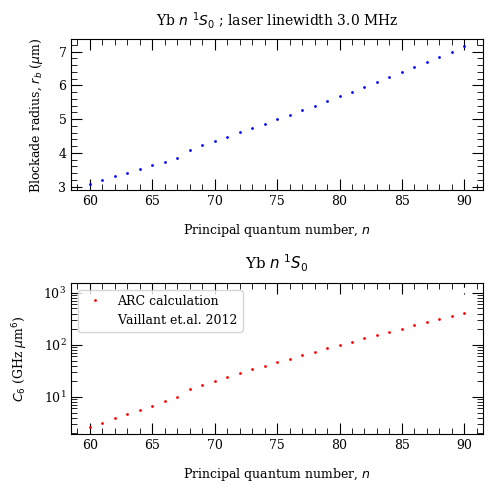

In [24]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,"b.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^1S_0$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^1S_0$")
ax.semilogy(nList,abs(np.array(c6List)),"r.",label='ARC calculation')
ax.semilogy(nList, abs(np.array(c6S_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
plt.legend()
plt.tight_layout()
plt.show()

### $^1P_1$ $m_j=1$

In [25]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(60,91)
c6List = []
blockadeRadiusList = []

l=1
j=1
mj=1
s=0

#Vailant 2012 (for comaprison)
def C6_lit(n_list, a, b, c):
    return np.array([n**(11)*(a*n**2 + b*n + c)*1e-19*1.4448 for n in n_list]) #in GHz um^6
a2 = -7.74*1e-4 ; b2 = 0.167 ; c2 = -2.73 # 1P1 state in a.u.
c6P_list = [] # in GHz um^6 

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(n,l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(0,0, 5, 35e9)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    print("C_6 [%s ; singlet ; mj=%i]= %.0f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6List.append(c6)
    c6P = C6_lit([int(n)], a2, b2, c2)
    c6P_list.append(c6P)
    print("Vailant 2012: %.2f GHz (mu m)^6" %c6P.flatten())
    blockadeRadiusList.append(blockade)

C_6 [60 P 2/2 m_j= 1 ; singlet ; mj=1]= -23 GHz (mu m)^6	4.4 mu m
Vailant 2012: 23.61 GHz (mu m)^6
C_6 [61 P 2/2 m_j= 1 ; singlet ; mj=1]= -28 GHz (mu m)^6	4.6 mu m
Vailant 2012: 28.77 GHz (mu m)^6
C_6 [62 P 2/2 m_j= 1 ; singlet ; mj=1]= -34 GHz (mu m)^6	4.7 mu m
Vailant 2012: 34.95 GHz (mu m)^6
C_6 [63 P 2/2 m_j= 1 ; singlet ; mj=1]= -42 GHz (mu m)^6	4.9 mu m
Vailant 2012: 42.31 GHz (mu m)^6
C_6 [64 P 2/2 m_j= 1 ; singlet ; mj=1]= -51 GHz (mu m)^6	5.1 mu m
Vailant 2012: 51.04 GHz (mu m)^6
C_6 [65 P 2/2 m_j= 1 ; singlet ; mj=1]= -62 GHz (mu m)^6	5.2 mu m
Vailant 2012: 61.38 GHz (mu m)^6
C_6 [66 P 2/2 m_j= 1 ; singlet ; mj=1]= -74 GHz (mu m)^6	5.4 mu m
Vailant 2012: 73.59 GHz (mu m)^6
C_6 [67 P 2/2 m_j= 1 ; singlet ; mj=1]= -88 GHz (mu m)^6	5.6 mu m
Vailant 2012: 87.95 GHz (mu m)^6
C_6 [68 P 2/2 m_j= 1 ; singlet ; mj=1]= -105 GHz (mu m)^6	5.7 mu m
Vailant 2012: 104.82 GHz (mu m)^6
C_6 [69 P 2/2 m_j= 1 ; singlet ; mj=1]= -125 GHz (mu m)^6	5.9 mu m
Vailant 2012: 124.57 GHz (mu m)^6
C_6 [7

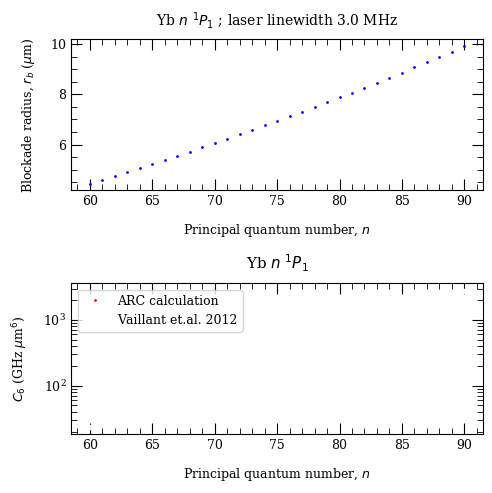

In [26]:
lit = C6_lit(nList, a2,b2,c2)*1e-19 * 1.4448 #in GHz um^6

fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,"b.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^1P_1$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^1P_1$")
ax.semilogy(nList,abs(np.array(c6List)),"r.",label='ARC calculation')
ax.semilogy(nList, abs(np.array(c6P_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
pi

3.141592653589793

In [21]:
laserLinewidth = 0.003 # in GHz
nList = np.arange(60,91)
c6List = []
blockadeRadiusList = []

l=0
j=1
mj=0
s=1

theta = 90*pi/180.

for n in nList:
    calculation1 = PairStateInteractions(Ytterbium174(), n, l, j, n, l, j, mj, mj, s=s, s2=s)
    state = printStateString(n,l,j)+" m_j= %i" %mj
    c6 = calculation1.getC6perturbatively(theta,0, 5, 35e9)
    blockade = (abs(c6/laserLinewidth))**(1/6.)
    print("C_6 [%s ; triplet ; mj=%i]= %.0f GHz (mu m)^6\t%.1f mu m" % (state,mj,c6,blockade))
    c6List.append(c6)
    blockadeRadiusList.append(blockade)

C_6 [60 S 2/2 m_j= 0 ; triplet ; mj=0]= 43 GHz (mu m)^6	4.9 mu m
C_6 [61 S 2/2 m_j= 0 ; triplet ; mj=0]= 54 GHz (mu m)^6	5.1 mu m
C_6 [62 S 2/2 m_j= 0 ; triplet ; mj=0]= 66 GHz (mu m)^6	5.3 mu m
C_6 [63 S 2/2 m_j= 0 ; triplet ; mj=0]= 81 GHz (mu m)^6	5.5 mu m
C_6 [64 S 2/2 m_j= 0 ; triplet ; mj=0]= 97 GHz (mu m)^6	5.6 mu m
C_6 [65 S 2/2 m_j= 0 ; triplet ; mj=0]= 116 GHz (mu m)^6	5.8 mu m
C_6 [66 S 2/2 m_j= 0 ; triplet ; mj=0]= 138 GHz (mu m)^6	6.0 mu m
C_6 [67 S 2/2 m_j= 0 ; triplet ; mj=0]= 164 GHz (mu m)^6	6.2 mu m
C_6 [68 S 2/2 m_j= 0 ; triplet ; mj=0]= 193 GHz (mu m)^6	6.3 mu m
C_6 [69 S 2/2 m_j= 0 ; triplet ; mj=0]= 226 GHz (mu m)^6	6.5 mu m
C_6 [70 S 2/2 m_j= 0 ; triplet ; mj=0]= 263 GHz (mu m)^6	6.7 mu m
C_6 [71 S 2/2 m_j= 0 ; triplet ; mj=0]= 306 GHz (mu m)^6	6.8 mu m
C_6 [72 S 2/2 m_j= 0 ; triplet ; mj=0]= 354 GHz (mu m)^6	7.0 mu m
C_6 [73 S 2/2 m_j= 0 ; triplet ; mj=0]= 409 GHz (mu m)^6	7.2 mu m
C_6 [74 S 2/2 m_j= 0 ; triplet ; mj=0]= 469 GHz (mu m)^6	7.3 mu m
C_6 [75 S 2/2 m

In [6]:
colorsrc = plt.rcParams["axes.prop_cycle"].by_key()["color"]

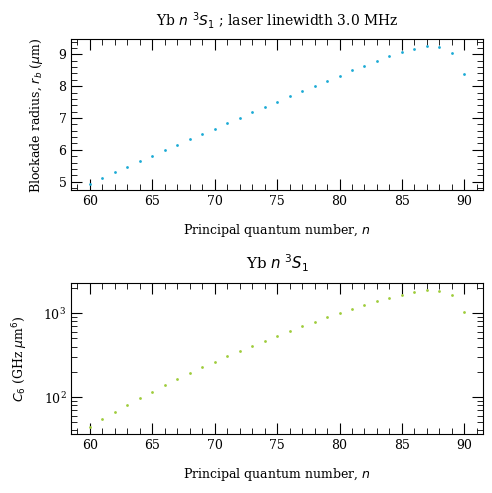

In [7]:
#lit = C6_lit(nList, a2,b2,c2)*1e-19 * 1.4448 #in GHz um^6

fig=plt.figure(figsize=(5,5), dpi=100)
ax = plt.subplot(2,1,1)
ax.plot(nList,blockadeRadiusList,'.',color=colorsrc[0])
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius, $r_b$ ($\mu$m)")
ax.set_title(r"Yb $n$ ${}^3S_1$ ; laser linewidth %.1f MHz"% \
             (laserLinewidth*1.e3), fontsize=10)
ax = plt.subplot(2,1,2)
ax.set_title(r"Yb $n$ ${}^3S_1$")
ax.semilogy(nList,abs(np.array(c6List)),'.',color=colorsrc[1],label='ARC calculation')
#ax.semilogy(nList, abs(np.array(c6P_list)), marker='o', markersize=4, mfc='w', linestyle='', mec='k', label='Vaillant et.al. 2012')
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$ (GHz $\mu$m$^6$)")
# plt.legend()
plt.tight_layout()
plt.show()

## Short range interactions<a class="anchor" id="2.4"></a>

For $R<R_\mathrm{vdW}$ it is no longer possible to calculate the interactions using perturbation theory, and instead (as with Stark-shift) it is necessary to diagonalize the pair-state interaction Hamiltionian, taking into account all pair states in the vicinity of the target pair state.

### $^1S_0$


Calculating Hamiltonian matrix...


	matrix (dimension  575 )

Matrix R3 100.0 % (state 173 of 173)



Diagonalizing interaction matrix...

99% Now we are plotting...


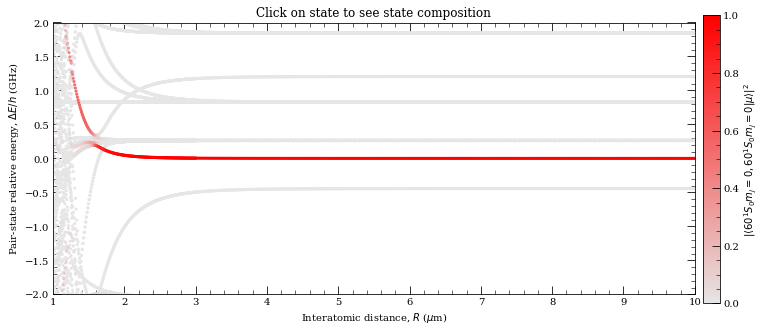

0

In [59]:
#Interaction Potential for 60 1S0
#=================================
n0=60;l0=0;j0=0;mj0=0; s=0#Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0,interactionsUpTo = 1, s=s,s2=s)

#R array (um)
#normally should start from LeRoy radius
#but this one is obtained from wavefunctions
#which calculation has not been implemented for divalent atoms
#here starts from 0.1 um
r=np.append(np.linspace(0.1,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Finds relevant states in the vicinity of the given pair-state

#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)

#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

From the above extract van der Waals range, and values of  $C_3$  and  $C_6$:

Data points to fit =  348
It's estimated to be around 0.44 mu m from the current fit.
Rvdw =   0.4383028398478778  mu m
offset =  -7.097698366651875e-07 
 scale =  2.727005110631891


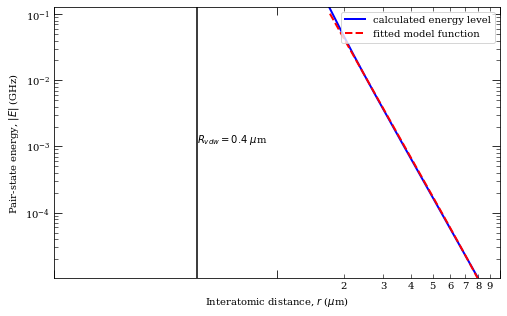

ERROR: unable to find a fit for C3.
c6 =  2.7797611394912876  GHz /R^6 (mu m)^6
offset =  -1.6957403797283642e-05


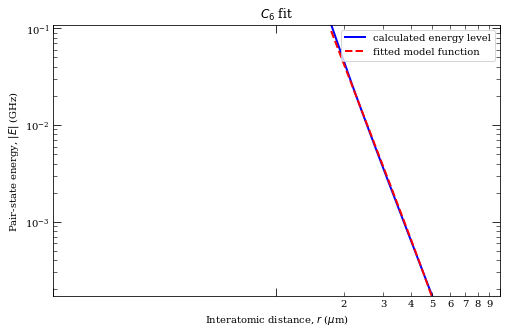

2.7797611394912876

In [61]:
#van der Waals range
rStart = 0.1 ; rStop = 8.000000 #fitting range
rvdw = calc.getVdwFromLevelDiagram(rStart,rStop,minStateContribution=0.6,showPlot=True)

#C3
rStrat = 0.2 ; rStop = rvdw*0.99 #fitting range
calc.getC3fromLevelDiagram(rStart,rStop,showPlot=True,minStateContribution=0.5)

#C6
rStart=4*rvdw ; rStop=5. #fitting range
calc.getC6fromLevelDiagram(rStart,rStop,showPlot=True,minStateContribution=0.5)

### $^1P_1$


Calculating Hamiltonian matrix...


	matrix (dimension  429 )

Matrix R3 100.0 % (state 157 of 157)



Diagonalizing interaction matrix...

99% Now we are plotting...


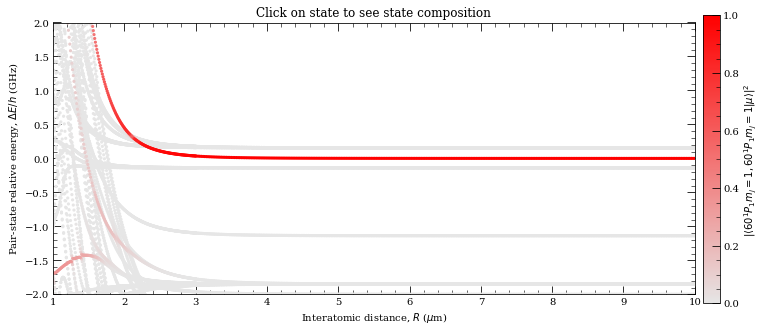

0

In [57]:
#Interaction Potential for 60 1P1
#=================================
n0=60;l0=1;j0=1;mj0=1; s=0#Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0,interactionsUpTo = 1, s=s,s2=s)

#R array (um)
#normally should start from LeRoy radius
#but this one is obtained from wavefunctions
#which calculation has not been implemented for divalent atoms
#here starts from 0.1 um
r=np.append(np.linspace(0.1,3,300),np.linspace(3.01,10.0,300))

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Finds relevant states in the vicinity of the given pair-state

#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)

#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

From the above extract van der Waals range, and values of  $C_3$  and  $C_6$:

Data points to fit =  304
It's estimated to be around 0.64 mu m from the current fit.
Rvdw =   0.6424210061411015  mu m
offset =  4.0255268872509e-06 
 scale =  -25.30151073731394


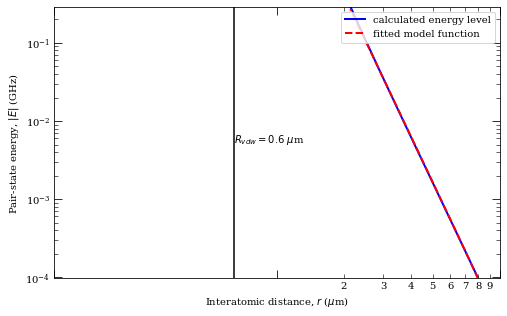

ERROR: unable to find a fit for C3.
c6 =  27.01032250436738  GHz /R^6 (mu m)^6
offset =  -0.0002043779885185429


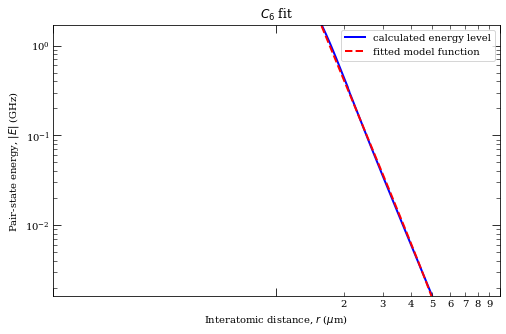

27.01032250436738

In [58]:
#van der Waals range
rStart = 0.1 ; rStop = 8.000000 #fitting range
rvdw = calc.getVdwFromLevelDiagram(rStart,rStop,minStateContribution=0.6,showPlot=True)

#C3
rStrat = 0.2 ; rStop = rvdw*0.99 #fitting range
calc.getC3fromLevelDiagram(rStart,rStop,showPlot=True,minStateContribution=0.5)

#C6
rStart=1.3*rvdw ; rStop=5. #fitting range
calc.getC6fromLevelDiagram(rStart,rStop,showPlot=True,minStateContribution=0.5)

### Spheghetti in the short distance region<a class="anchor" id="2.4.1"></a>

At very short range the energy levels are strongly mixed, creating highly complex molecular potentials and requiring a very large basis set to acheive convergence. This effect, also referred to as 'spheghetti', also requires going beyond dipole-dipole interactions and instead include higher-order dipole-quadrupole and quadrupole-quadrupole. This is done using the `interactionsUpTo = 2` command, but is only significant for evaluation of the interaction potential within the dense spheghetti of mode. 


Calculating Hamiltonian matrix...


	matrix (dimension  2822 )

Matrix R3 100.0 % (state 922 of 922)

Matrix R4 100.0 % (state 922 of 922)

Matrix R5 100.0 % (state 922 of 922)



Diagonalizing interaction matrix...

99% Now we are plotting...


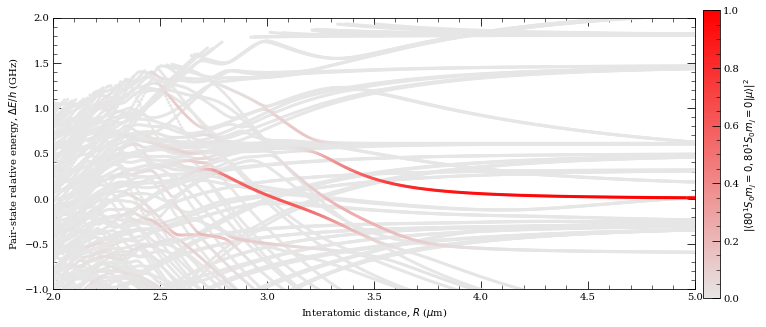

0

In [109]:
#Interaction Potential for 80 1S0 -- short distance, spheghetti
#=================================
n0=80;l0=0;j0=0;mj0=0; s=0#Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

calculation1 = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0,interactionsUpTo = 2, s=s,s2=s)
calculation1.defineBasis( 0., 0., 5, 5,30e9,progressOutput=True)
calculation1.diagonalise(np.linspace(2.,5.,400),100,progressOutput=True)

calculation1.plotLevelDiagram()
calculation1.ax.set_xlim(2., 5.)
calculation1.ax.set_ylim(-1.0,2.)
calculation1.showPlot(interactive=False)

## Pair-state energy at fixed detunning<a class="anchor" id="2.5"></a>

If we are interested in pair-state energy levels at some fixed detuning from the non-interacting pair-state energy, we can speed up the calculation by:
- considering only a certain number of eigenvectors `nEig=25` (e.g. 25) closest to the specified detuning, 
- and using optional parameter `eigenstateDetuning = 2.5e9` (eg. 2.5 GHz). 


Calculating Hamiltonian matrix...


	matrix (dimension  1303 )

Matrix R3 100.0 % (state 407 of 407)



Diagonalizing interaction matrix...

99% Now we are plotting...


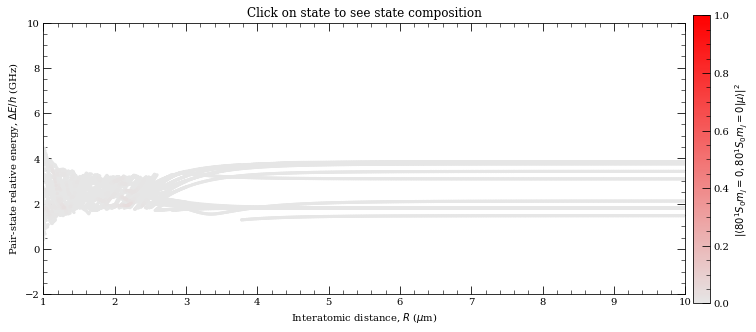

0

In [221]:
#Interaction Potential for 80 1S0
#=================================
n0=80;l0=0;j0=0;mj0=0;s=0 #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Ytterbium174(), n0,l0,j0,n0,l0,j0, mj0,mj0,interactionsUpTo = 1,s=s,s2=s)

#R array (um)
r=np.append(np.linspace(0.3,3,300),np.linspace(3.01,10.0,300))
#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True)
#Diagonalise
nEig=25 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True, eigenstateDetuning = 2.5e9)
#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1.0,10.0)
calc.ax.set_ylim(-2,10)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

## Resonant interactions<a class="anchor" id="2.6"></a>

When two pair-states are resonant, their interaction scales as $\propto \mathbf{R^{-3}}$. For given two pair-states $|n,l,j,n,l,j\rangle                  \leftrightarrow |n_1,l_1,j_1,n_2,l_2,j_2\rangle$, $C_3$ is obtained via `getC3term()` as presented earlier.

External electric fields can be used to bring some pair-states in resonance with another pair of states. This allows tuning of atom interactions from short range van-der Waals interactions ( $\propto \mathbf{R^{-6}}$ ), to stronger, long-range resonant dipole-dipole interactions ( $\propto \mathbf{R^{-3}}$ ). You can find these states through `StarkMapResonances`.

In the plots below, the red line corresponds to the original pair-state, and the black points correspond to the states whose dominant contribution (remember that electric field mixes states from initial basis) are dipole coupled to the original pair state. 

This is useful for interactive use, when one can obtain the contribution of the states resonant with the original pair-state (black dots that are crossing the red line) simply by clicking on them. This interactive features appears when the plot is displayed in a separate windown rather than inline the notebook.

Resonance is where the red and black meet.

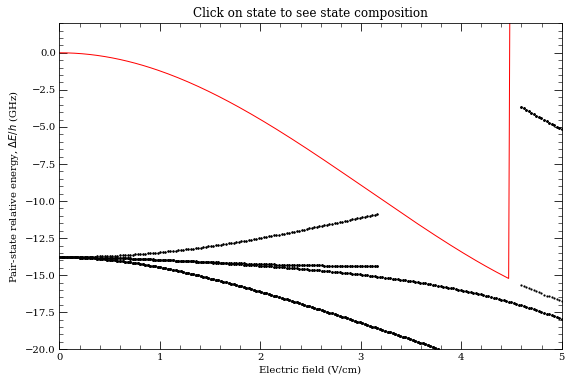

In [140]:
# 60 1S0
n=60
l=0
j=0
mj=0
s=0

nmin=n-1 #min principal quantum number considered in calc
nmax=n+1 #max principal quantum number
maxL = 20 #max orbital angular momentum quantum number

eFieldList=np.linspace(0,500,200)

calculation = StarkMapResonances(Ytterbium174(),[n,l,j,mj,s],Ytterbium174(),[n,l,j,mj,s])
calculation.findResonances(nmin,nmax,maxL,eFieldList,energyRange=[-20e9,2.e9])    
calculation.showPlot()    

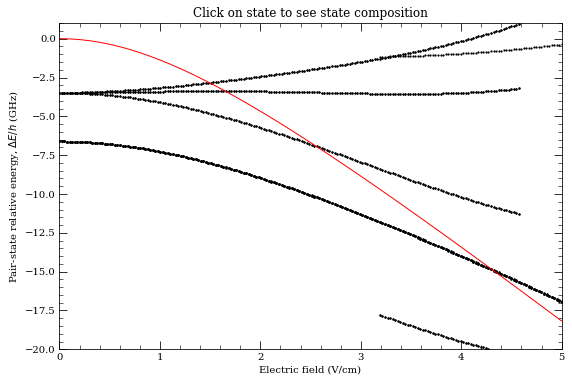

In [122]:
# 60 1P1
n=60
l=1
j=1
mj=1
s=0

nmin=n-1 #min principal quantum number considered in calc
nmax=n+1 #max principal quantum number
maxL = 20 #max orbital angular momentum quantum number

eFieldList=np.linspace(0,500,200)

calculation = StarkMapResonances(Ytterbium174(),[n,l,j,mj,s],Ytterbium174(),[n,l,j,mj,s])
calculation.findResonances(nmin,nmax,maxL,eFieldList,energyRange=[-20e9,1.e9])    
calculation.showPlot()    

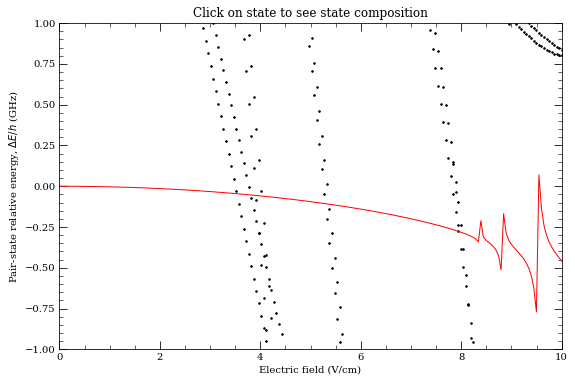

In [125]:
# 60 1D2
n=60
l=2
j=2
mj=2
s=0

nmin=n-1 #min principal quantum number considered in calc
nmax=n+1 #max principal quantum number
maxL = 20 #max orbital angular momentum quantum number

eFieldList=np.linspace(0,1000,200)

calculation = StarkMapResonances(Ytterbium174(),[n,l,j,mj,s],Ytterbium174(),[n,l,j,mj,s])
calculation.findResonances(nmin,nmax,maxL,eFieldList,energyRange=[-1e9,1.e9])    
calculation.showPlot()    

# General atomic vapour properties<a class="anchor" id="3"></a>

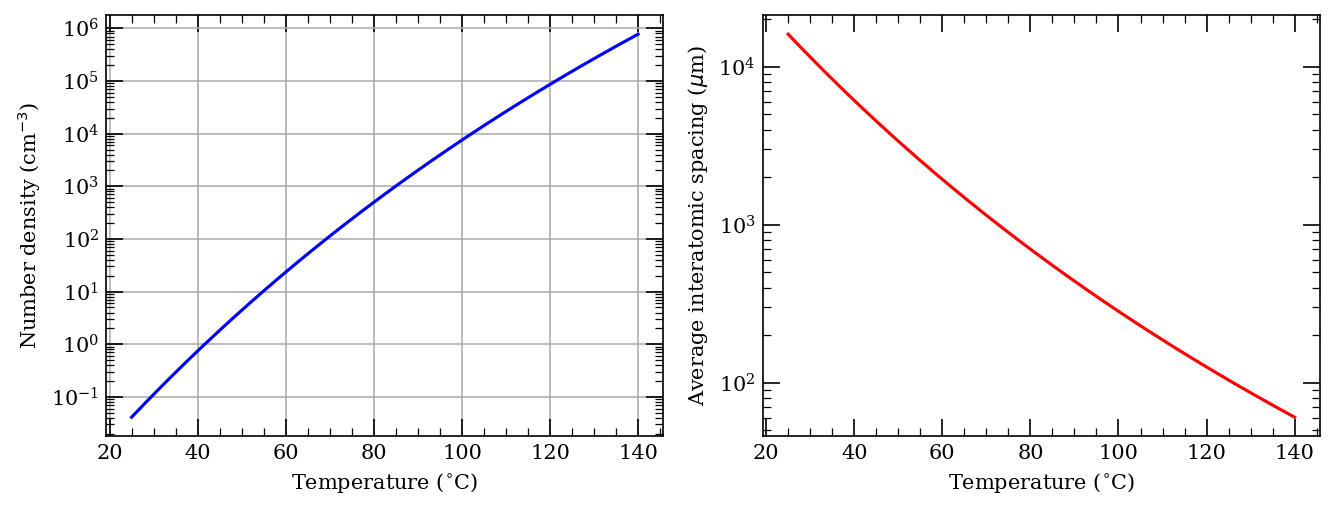

In [148]:
atom = Ytterbium174()
temperature = np.linspace(273.15+25,273.15+140,300)
numberDensity = []
interatomicSpacing = []
for t in temperature:
    numberDensity.append(atom.getNumberDensity(t)*1e-6) # 1e-6 factor converts result to 1/cm^3
    interatomicSpacing.append(atom.getAverageInteratomicSpacing(t)*1e6) #1e6 for um

# plotting results
fig,ax = plt.subplots(1, 2,figsize=(9,3.5),dpi=150)
ax[0].semilogy(temperature-273.15,numberDensity,"b-")
ax[0].set_xlabel("Temperature ($^{\circ}$C)")
ax[0].set_ylabel("Number density (cm$^{-3}$)")
ax[0].grid()

ax[1].semilogy(temperature-273.15,interatomicSpacing,"r-")
ax[1].set_xlabel("Temperature ($^{\circ}$C)")
ax[1].set_ylabel("Average interatomic spacing ($\mu$m)")
#ax[1].set_ylim(0.1,10)
plt.tight_layout()
plt.show()

In [16]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield [val.__name__]
list(imports())

[['builtins'],
 ['builtins'],
 ['importlib'],
 ['matplotlib.pyplot'],
 ['numpy'],
 ['arc.wigner'],
 ['arc.alkali_atom_functions'],
 ['arc.alkali_atom_data'],
 ['sqlite3'],
 ['csv'],
 ['gzip'],
 ['re'],
 ['shutil'],
 ['sys'],
 ['os'],
 ['pickle'],
 ['arc.divalent_atom_functions'],
 ['arc.divalent_atom_data'],
 ['arc.calculations_atom_single'],
 ['datetime'],
 ['matplotlib'],
 ['scipy.interpolate'],
 ['arc.calculations_atom_pairstate'],
 ['matplotlib'],
 ['scipy'],
 ['scipy'],
 ['types'],
 ['arc.beta'],
 ['arc.arc_c_extensions']]

In [17]:
from platform import python_version

print(python_version())

3.7.4
